In [275]:
import numpy as np 
import pandas as pd 
import os

In [276]:
import warnings
warnings.filterwarnings('ignore')

In [277]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [278]:
df=pd.read_csv('deceptive-opinion.csv')

In [279]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [280]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [281]:
df['polarity'].unique()

array(['positive', 'negative'], dtype=object)

In [282]:
df['hotel'].unique()

array(['conrad', 'hyatt', 'omni', 'fairmont', 'sheraton', 'knickerbocker',
       'homewood', 'swissotel', 'ambassador', 'affinia', 'hardrock',
       'talbott', 'hilton', 'james', 'monaco', 'sofitel', 'palmer',
       'intercontinental', 'allegro', 'amalfi'], dtype=object)

In [283]:
df['source'].unique()

array(['TripAdvisor', 'MTurk', 'Web'], dtype=object)

<Axes: xlabel='deceptive', ylabel='count'>

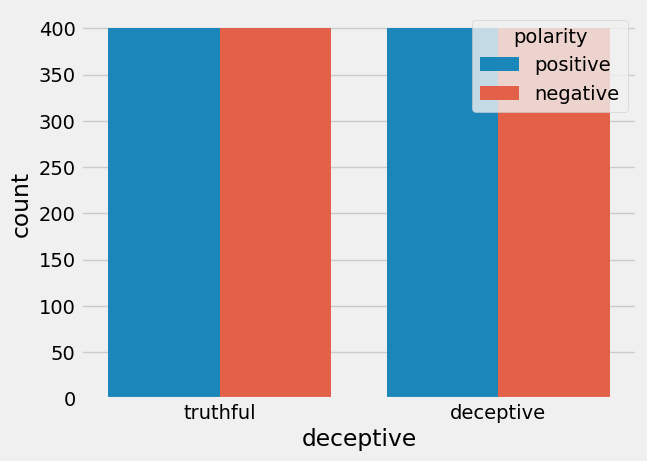

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'],hue='polarity',data=df)

<Axes: xlabel='deceptive', ylabel='count'>

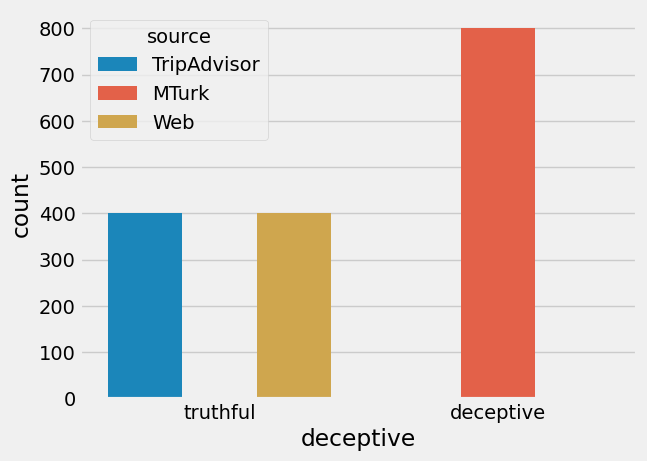

In [285]:
sns.countplot(x=df['deceptive'],hue='source',data=df)

<Axes: xlabel='deceptive', ylabel='count'>

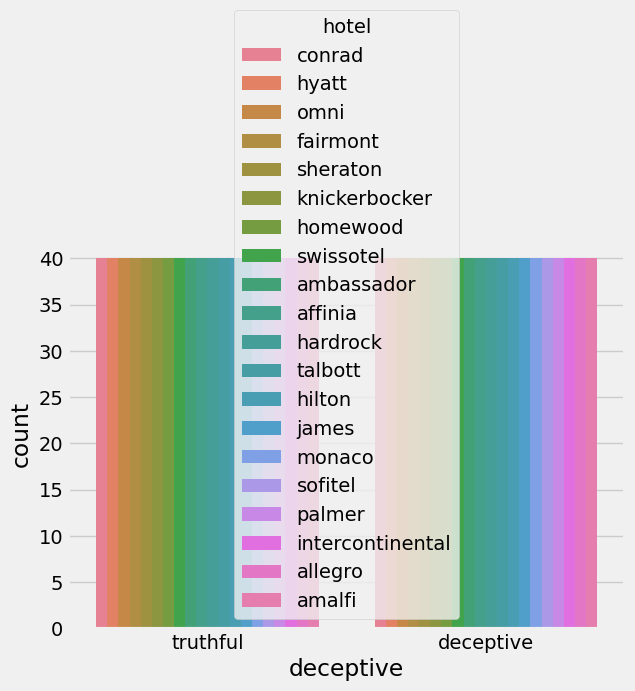

In [286]:
sns.countplot(x=df['deceptive'],hue='hotel',data=df)

In [287]:
df=df.drop(['hotel'],axis=1)

In [288]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [289]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [290]:
df['complete_text']=df['source'] + ' ' +df['text']

In [291]:
df['complete_text']=df['complete_text'].apply(text_cleaning)

In [292]:
df.shape

(1600, 5)

In [293]:
df = df.drop_duplicates('complete_text')

In [294]:
df

,deceptive,polarity,source,text,complete_text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...,tripadvisor stayed one night getaway family th...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,tripadvisor triple rate upgrade view room less...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...,tripadvisor comes little late finally catching...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,tripadvisor omni chicago really delivers front...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...,tripadvisor asked high floor away elevator got...
...,...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...,mturk problems started booked intercontinental...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,mturk amalfi hotel beautiful website interior ...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,mturk intercontinental chicago magnificent mil...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i...",mturk palmer house hilton looks good pictures ...


In [295]:
stemmer = PorterStemmer()

In [296]:
df['complete_text'] = df['complete_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [297]:
df

,deceptive,polarity,source,text,complete_text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...,tripadvisor stay one night getaway famili thur...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,tripadvisor tripl rate upgrad view room less a...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...,tripadvisor come littl late final catch review...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,tripadvisor omni chicago realli deliv front sp...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...,tripadvisor ask high floor away elev got room ...
...,...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...,mturk problem start book intercontinent chicag...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,mturk amalfi hotel beauti websit interior deco...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,mturk intercontinent chicago magnific mile out...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i...",mturk palmer hous hilton look good pictur outs...


In [298]:
df['complete_text'].iloc[39]

'tripadvisor stay omni band town room amaz walk hotel gorgeou complaint prompt room servic friendli front desk mani shop beauti fountin around great hotel great citi'

In [299]:
df.shape

(1596, 5)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   deceptive      1596 non-null   object
 1   polarity       1596 non-null   object
 2   source         1596 non-null   object
 3   text           1596 non-null   object
 4   complete_text  1596 non-null   object
dtypes: object(5)
memory usage: 74.8+ KB


In [301]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,2)).fit(df['complete_text'])

In [302]:
X = df['complete_text']
Y = df['deceptive']
X = vect.transform(X)
le=LabelEncoder()
Y=le.fit_transform(Y)

In [303]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [304]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1276, 78702)
Size of y_train: (1276,)
Size of x_test: (320, 78702)
Size of y_test: (320,)


In [305]:
x_train

<1276x78702 sparse matrix of type '<class 'numpy.int64'>'
	with 166116 stored elements in Compressed Sparse Row format>

In [306]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [307]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

# **SVM**

In [308]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
pred_test = svm.predict(x_test)
pred_train=svm.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  100.0
----------------------------------
Test accuracy:  100.0
----------------------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       172

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

----------------------------------


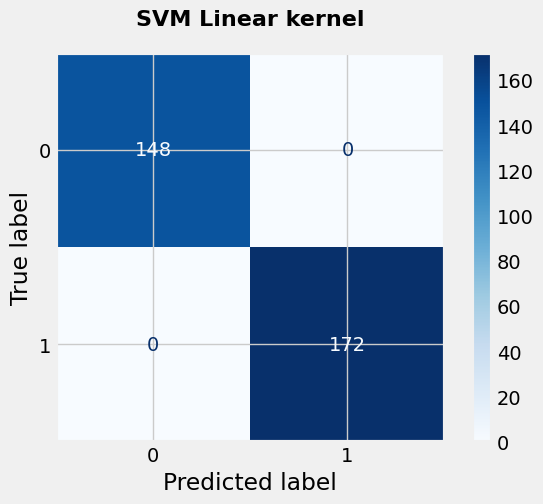

In [309]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM Linear kernel',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [310]:

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')  
svm_classifier.fit(x_train, y_train)
pred_test = svm_classifier.predict(x_test)
pred_train=svm_classifier.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  100.0
----------------------------------
Test accuracy:  99.375
----------------------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.99      0.99      0.99       172

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

----------------------------------


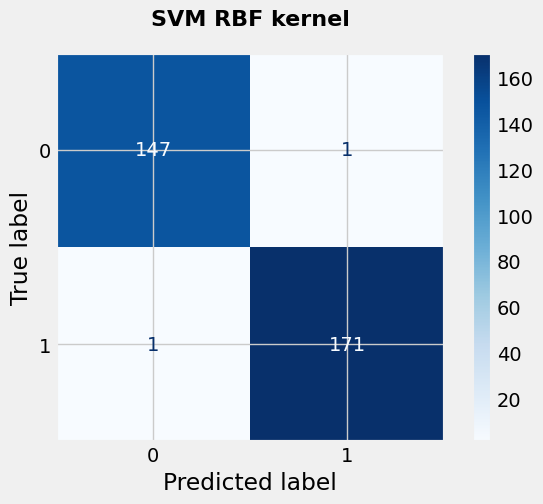

In [311]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM RBF kernel',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [312]:
svm_classifier = SVC(kernel='poly', degree=1)  
svm_classifier.fit(x_train, y_train)
pred_test = svm_classifier.predict(x_test)
pred_train=svm_classifier.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  100.0
----------------------------------
Test accuracy:  100.0
----------------------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       172

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

----------------------------------


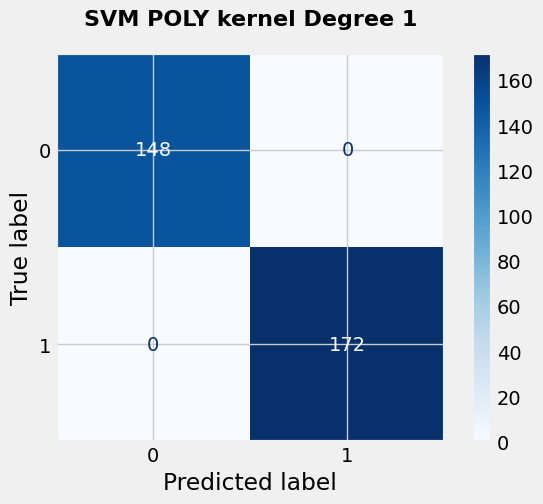

In [313]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM POLY kernel Degree 1',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [314]:
svm_classifier = SVC(kernel='poly', degree=2)  
svm_classifier.fit(x_train, y_train)
pred_test = svm_classifier.predict(x_test)
pred_train=svm_classifier.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  99.84326018808778
----------------------------------
Test accuracy:  98.125
----------------------------------


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       148
           1       0.98      0.98      0.98       172

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320

----------------------------------


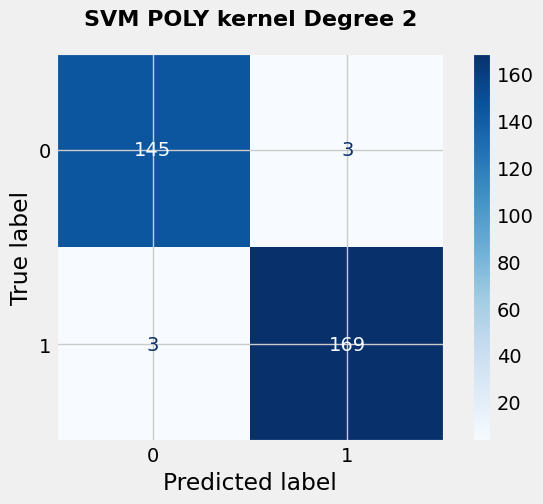

In [315]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM POLY kernel Degree 2',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [316]:
svm_classifier = SVC(kernel='poly', degree=3)  
svm_classifier.fit(x_train, y_train)
pred_test = svm_classifier.predict(x_test)
pred_train=svm_classifier.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  99.84326018808778
----------------------------------
Test accuracy:  94.6875
----------------------------------


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       148
           1       0.98      0.92      0.95       172

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320

----------------------------------


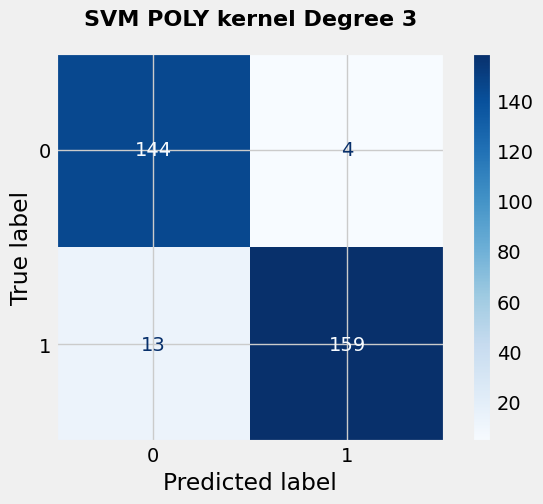

In [317]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM POLY kernel Degree 3',fontsize=16, fontweight='bold',pad=20)
plt.show()

In [318]:
svm_classifier = SVC(kernel='sigmoid')  
svm_classifier.fit(x_train, y_train)
pred_test = svm_classifier.predict(x_test)
pred_train=svm_classifier.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  99.21630094043887
----------------------------------
Test accuracy:  99.6875
----------------------------------


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       148
           1       1.00      0.99      1.00       172

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

----------------------------------


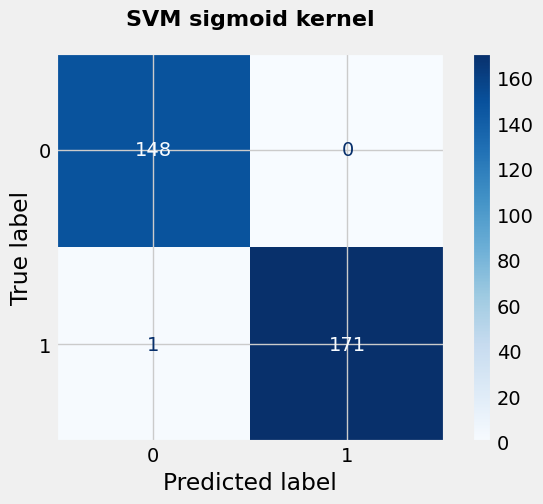

In [319]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM sigmoid kernel',fontsize=16, fontweight='bold',pad=20)
plt.show()

# **NB**

In [320]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_test = nb.predict(x_test)
pred_train=nb.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  100.0
----------------------------------
Test accuracy:  92.8125
----------------------------------


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       148
           1       0.99      0.88      0.93       172

    accuracy                           0.93       320
   macro avg       0.93      0.93      0.93       320
weighted avg       0.93      0.93      0.93       320

----------------------------------


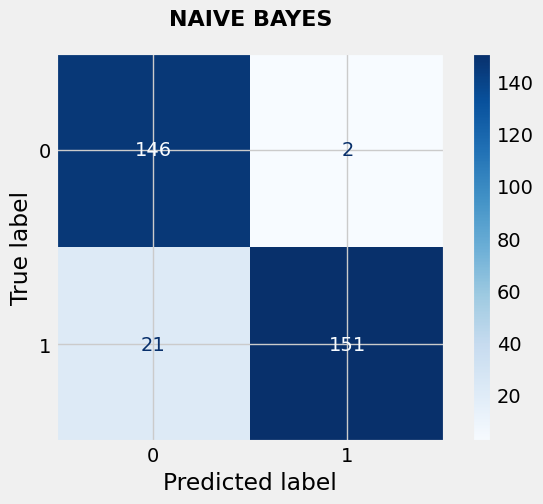

In [321]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('NAIVE BAYES',fontsize=16, fontweight='bold',pad=20)
plt.show()

# **Random Forest**

In [322]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train, y_train)
pred_test = rf_classifier.predict(x_test)
pred_train=rf_classifier.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  100.0
----------------------------------
Test accuracy:  99.0625
----------------------------------


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       148
           1       1.00      0.98      0.99       172

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

----------------------------------


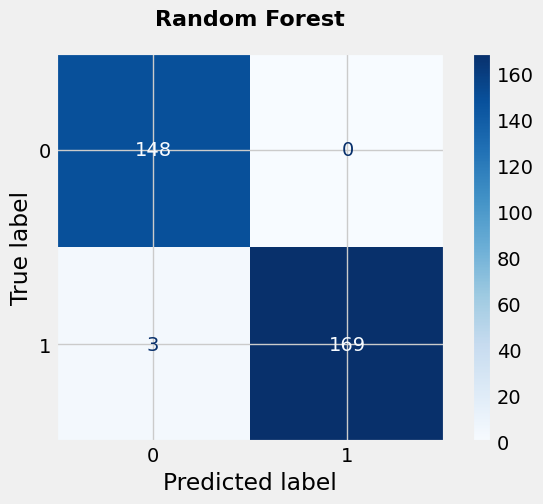

In [323]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf_classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest',fontsize=16, fontweight='bold',pad=20)
plt.show()

# **Ada Boost**

In [324]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
ada_classifier.fit(x_train, y_train)
pred_test = ada_classifier.predict(x_test)
pred_train=ada_classifier.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  100.0
----------------------------------
Test accuracy:  100.0
----------------------------------


# ExtraTreesClassifier

In [334]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(random_state=42)
et.fit(x_train, y_train)
pred_train = et.predict(x_train)
pred_test = et.predict(x_test)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)
print("Extra Trees Train accuracy: ", accuracy_train * 100)
print('----------------------------------')
print("Extra Trees Test accuracy: ", accuracy_test * 100)
print('----------------------------------')

Extra Trees Train accuracy:  100.0
----------------------------------
Extra Trees Test accuracy:  98.75
----------------------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.99      0.99      0.99       172

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

----------------------------------


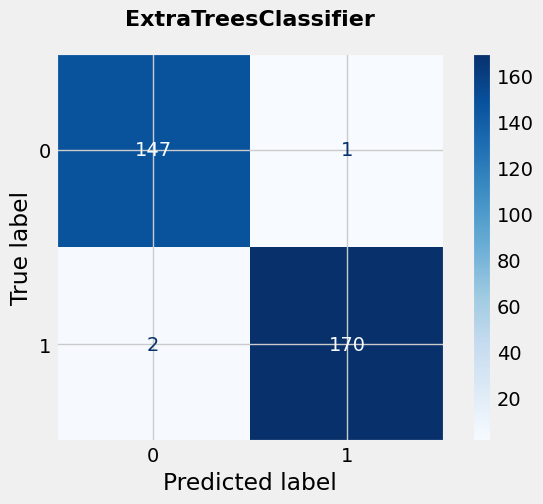

In [326]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=et.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=et.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('ExtraTreesClassifier',fontsize=16, fontweight='bold',pad=20)
plt.show()

# XGBoostClassifier

In [327]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
xgb.fit(x_train, y_train)
pred_train = xgb.predict(x_train)
pred_test = xgb.predict(x_test)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)
print("Extra Trees Train accuracy: ", accuracy_train * 100)
print('----------------------------------')
print("Extra Trees Test accuracy: ", accuracy_test * 100)
print('----------------------------------')

Extra Trees Train accuracy:  100.0
----------------------------------
Extra Trees Test accuracy:  100.0
----------------------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       172

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

----------------------------------


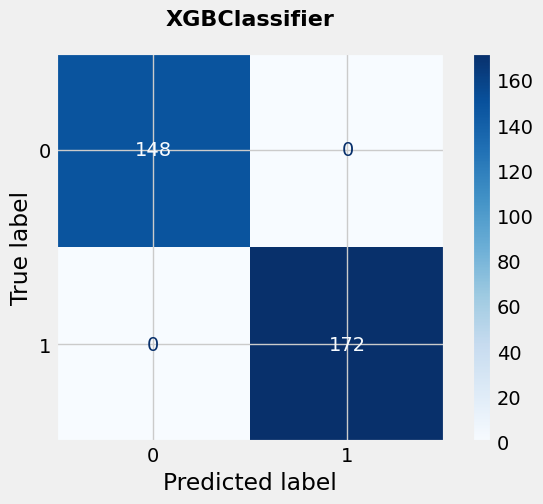

In [328]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=xgb.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('XGBClassifier',fontsize=16, fontweight='bold',pad=20)
plt.show()

# GradientBoostingClassifier

In [329]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(x_train, y_train)
pred_train = gbc.predict(x_train)
pred_test = gbc.predict(x_test)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)
print("Extra Trees Train accuracy: ", accuracy_train * 100)
print('----------------------------------')
print("Extra Trees Test accuracy: ", accuracy_test * 100)
print('----------------------------------')

Extra Trees Train accuracy:  100.0
----------------------------------
Extra Trees Test accuracy:  100.0
----------------------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       172

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

----------------------------------


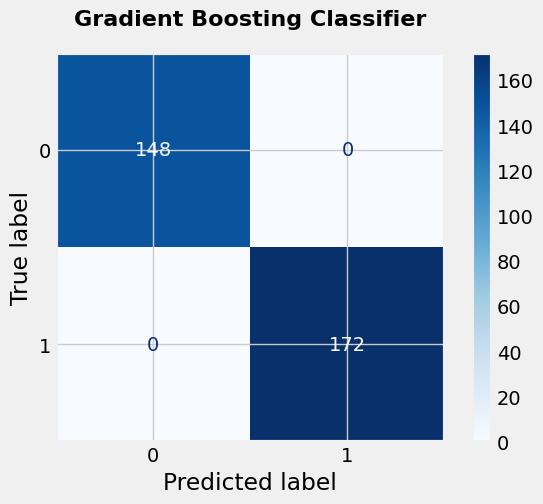

In [333]:
print(classification_report(y_test, pred_test))
print('----------------------------------')
plt.style.use('fivethirtyeight')
cm = confusion_matrix(y_test, pred_test, labels=gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=gbc.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Gradient Boosting Classifier',fontsize=16, fontweight='bold',pad=20)
plt.show()